In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
covid=pd.read_csv("D:/RMIT Semester 3/Case Studies/Victoria covid cases arima till 13th Sep/cases_daily_state_march.csv")
covid.head()

,Date,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
0,13/03,14,9,8,4.0,5,1.0,0,0.0
1,14/03,20,13,11,3.0,3,1.0,0,0.0
2,15/03,22,8,15,1.0,1,1.0,0,0.0
3,16/03,37,14,7,9.0,10,1.0,0,1.0
4,17/03,39,23,10,3.0,3,0.0,0,0.0


In [3]:
pd.set_option('display.max_rows',covid.shape[0]+1)

In [4]:
covid_Victoria=covid[['Date','VIC']]
covid_Victoria

,Date,VIC
0,13/03,9
1,14/03,13
2,15/03,8
3,16/03,14
4,17/03,23
5,18/03,27
6,19/03,29
7,20/03,28
8,21/03,51
9,22/03,67


## Get the second wave data

#### From the dataset it looks like the second wave started from 11th June till the 2nd of August

In [5]:
covid_vic_second_wave=covid_Victoria.iloc[90:143]
covid_vic_second_wave

,Date,VIC
90,11/06,8
91,12/06,4
92,13/06,8
93,14/06,9
94,15/06,12
95,16/06,9
96,17/06,21
97,18/06,18
98,19/06,13
99,20/06,25


In [6]:
n=covid_vic_second_wave['VIC']

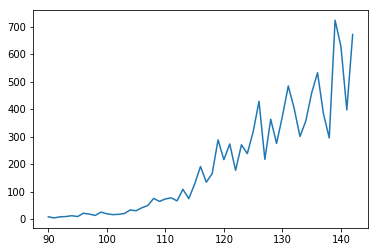

In [7]:
plt.plot(n)

In [8]:
n.to_frame()
n=n.reset_index(drop=True)

([<matplotlib.axis.XTick at 0x2b6b6999e48>,
 <a list of 10 Text xticklabel objects>)

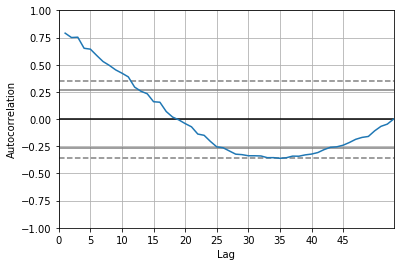

In [9]:
autocorrelation_plot(n)
plt.xticks(np.arange(0,50,step=5))

#p can ve 11,12,13

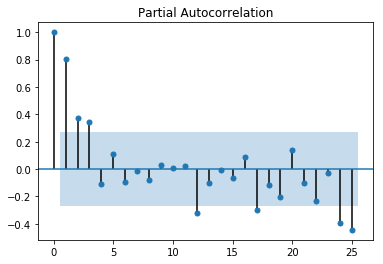

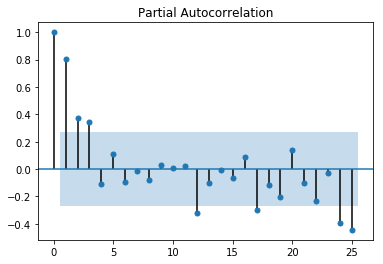

In [10]:
plot_pacf(n,lags=25)

#q can be 8

In [11]:
model=ARIMA(n,order=(11,1,5))
model_fit=model.fit(disp=0)


C:\Users\Kushagra\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Kushagra\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Kushagra\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Kushagra\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [12]:
residuals=pd.DataFrame(model_fit.resid)
residuals.describe()

,0
count,52.000000
mean,-9.320143
std,61.171669
min,-151.909325
25%,-42.079683
50%,-13.310115
75%,23.482446
max,111.617048


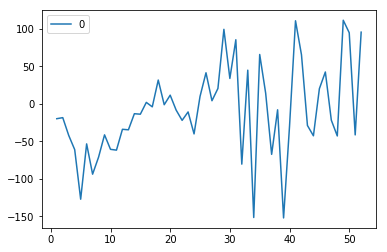

In [13]:
residuals.plot()

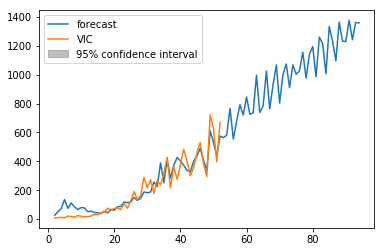

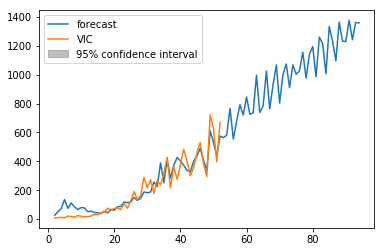

In [14]:
model_fit.plot_predict(2,94)

In [15]:
predictions=model_fit.forecast(steps=42)[0]

In [16]:
predictions=predictions.tolist()

In [17]:
pa=pd.DataFrame(predictions,columns=['VIC'])
n2=pd.DataFrame(n,columns=['VIC'])

In [18]:
n3=n2.append(pa)

In [19]:
n3=n3.reset_index(drop=True)

In [20]:
covid_current_second_wave=covid_Victoria.iloc[90:185,]
n6=covid_current_second_wave.reset_index(drop=True)

C:\Users\Kushagra\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Kushagra\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Kushagra\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


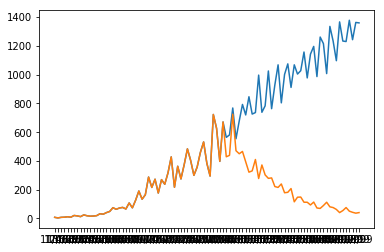

In [21]:
plt.plot(n3)
plt.plot(n6['Date'],n6['VIC'])

In [22]:
n6.shape

(95, 2)

In [23]:
n3['Non predicted cases']=n6['VIC']
n3['Date']=n6['Date']

In [24]:
n3
n3.to_csv("D:\RMIT Semester 3\Case Studies/stage4.csv")

Text(0, 0.5, 'Number of new cases')

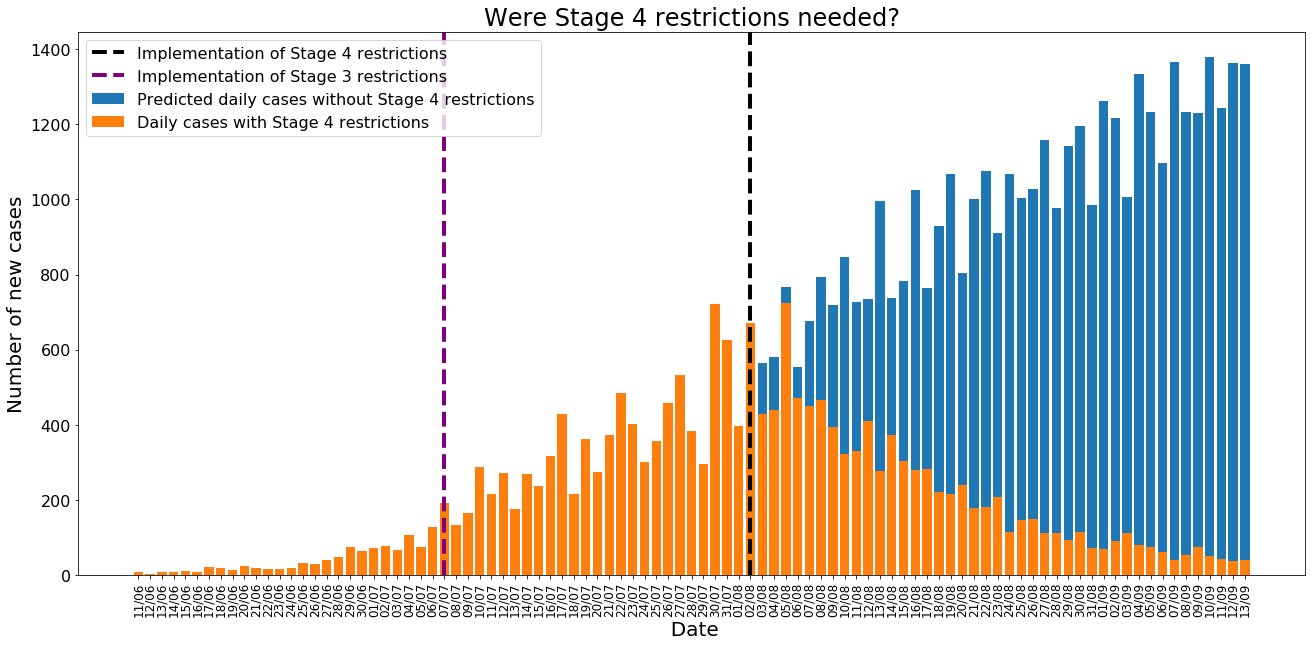

In [25]:
plt.figure(figsize=(22,10))
plt.bar(n3['Date'],n3['VIC'],label="Predicted daily cases without Stage 4 restrictions")
plt.bar(n3['Date'],n3['Non predicted cases'],label="Daily cases with Stage 4 restrictions")
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.axvline('02/08',0,1400,label='Implementation of Stage 4 restrictions',color="black",linewidth=4,linestyle='--')
plt.axvline('07/07',0,1400,label='Implementation of Stage 3 restrictions',color="purple",linewidth=4,linestyle='--')
plt.legend(fontsize=16)
plt.title("Were Stage 4 restrictions needed?",fontsize=24)
plt.xlabel("  Date ",fontsize=20)
plt.ylabel("Number of new cases",fontsize=20)

Text(0, 0.5, 'Number of new cases')

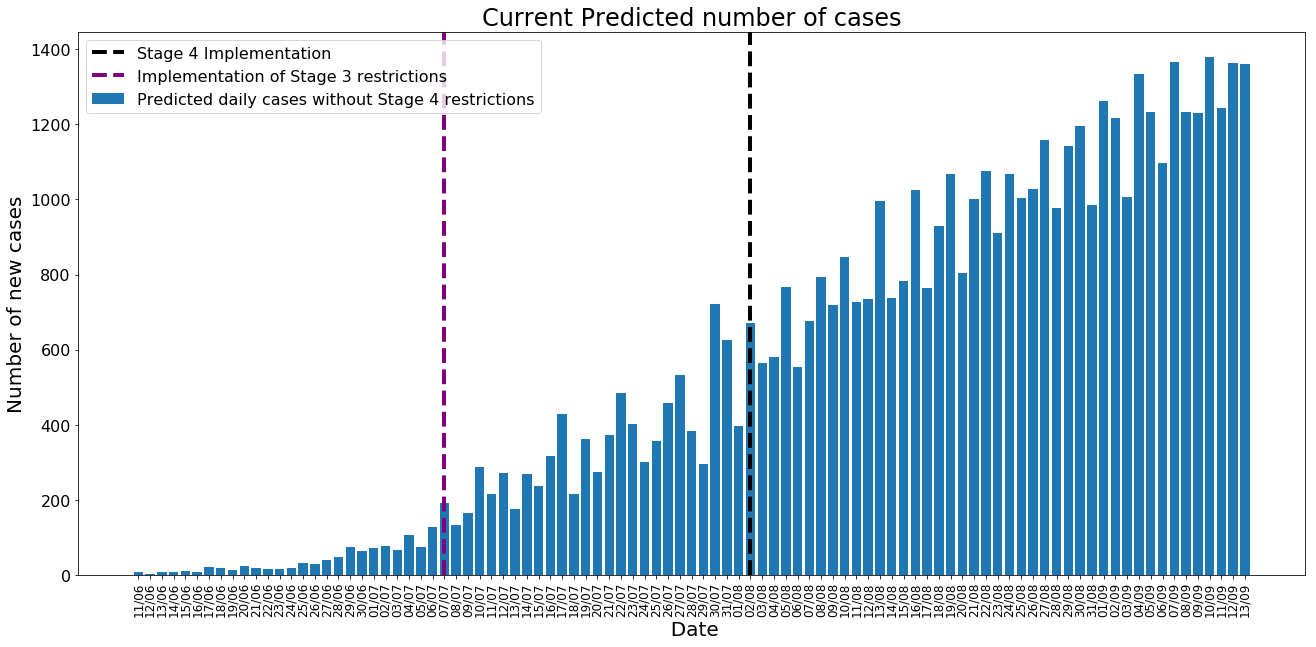

In [26]:
plt.figure(figsize=(22,10))
plt.bar(n3['Date'],n3['VIC'],label="Predicted daily cases without Stage 4 restrictions")
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.axvline('02/08',0,1400,label="Stage 4 Implementation",color="black",linewidth=4,linestyle='--')
plt.axvline('07/07',0,1400,label='Implementation of Stage 3 restrictions',color="purple",linewidth=4,linestyle='--')
plt.legend(fontsize=16)
plt.title("Current Predicted number of cases",fontsize=24)
plt.xlabel("  Date ",fontsize=20)
plt.ylabel("Number of new cases",fontsize=20)

Text(0, 0.5, 'Number of new cases')

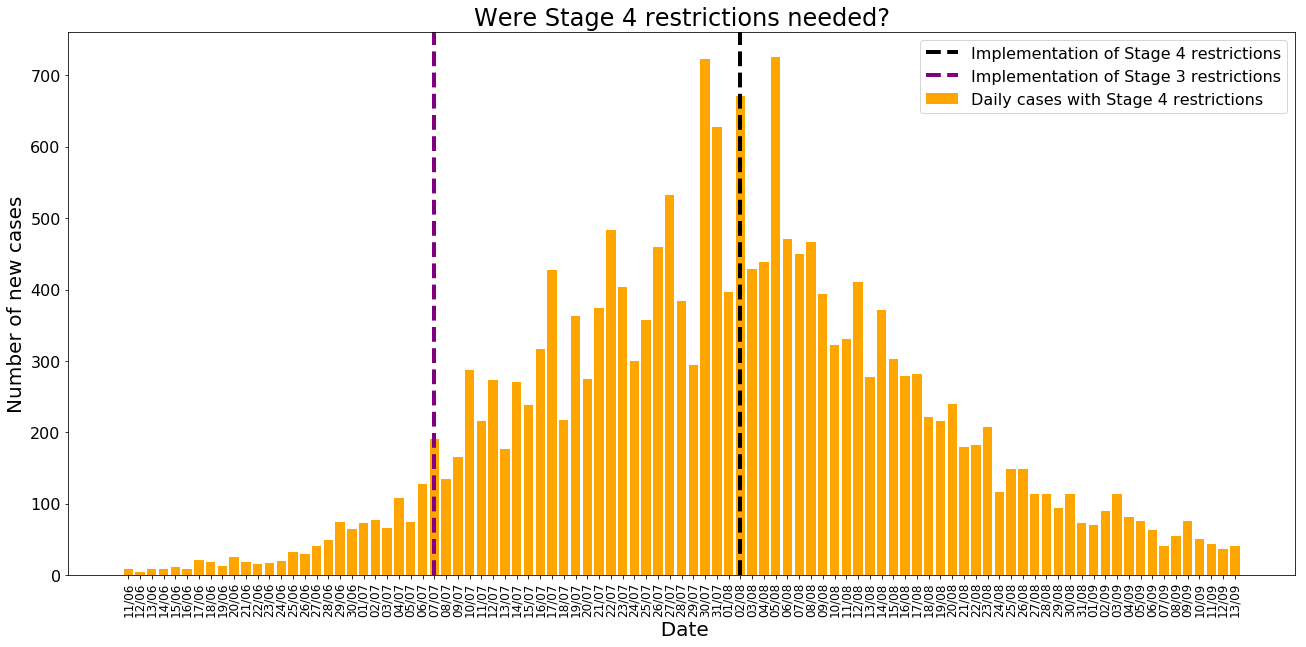

In [27]:
plt.figure(figsize=(22,10))
#plt.bar(n3['Date'],n3['VIC'],label="Predicted daily cases without Stage 4 restrictions")
plt.bar(n3['Date'],n3['Non predicted cases'],label="Daily cases with Stage 4 restrictions",color="orange")
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.axvline('02/08',0,1400,label='Implementation of Stage 4 restrictions',color="black",linewidth=4,linestyle='--')
plt.axvline('07/07',0,1400,label='Implementation of Stage 3 restrictions',color="purple",linewidth=4,linestyle='--')
plt.legend(fontsize=16)
plt.title("Were Stage 4 restrictions needed?",fontsize=24)
plt.xlabel("  Date ",fontsize=20)
plt.ylabel("Number of new cases",fontsize=20)

In [28]:
n3

,VIC,Non predicted cases,Date
0,8.000000,8,11/06
1,4.000000,4,12/06
2,8.000000,8,13/06
3,9.000000,9,14/06
4,12.000000,12,15/06
5,9.000000,9,16/06
6,21.000000,21,17/06
7,18.000000,18,18/06
8,13.000000,13,19/06
9,25.000000,25,20/06


## Prediction of new cases

In [29]:
covid=pd.read_csv("D:/RMIT Semester 3/Case Studies/victoria covid arima till 19th Sep/cases_daily_state_march.csv")
covid.tail()

,Date,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
186,15/09,7,42,1,0.0,0,0.0,0,0
187,16/09,10,42,0,0.0,1,0.0,0,0
188,17/09,5,28,1,0.0,1,0.0,0,0
189,18/09,6,45,0,0.0,0,0.0,0,0
190,19/09,3,21,0,NaN,0,NaN,0,0


In [30]:
covid=covid.drop(190)

In [31]:
covid.tail()

,Date,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
185,14/09,4,35,0,0.0,0,0.0,0,0
186,15/09,7,42,1,0.0,0,0.0,0,0
187,16/09,10,42,0,0.0,1,0.0,0,0
188,17/09,5,28,1,0.0,1,0.0,0,0
189,18/09,6,45,0,0.0,0,0.0,0,0


In [32]:
covid_Vic=covid[['Date','VIC']]

In [33]:
pd.set_option('display.max_rows',covid.shape[0]+1)
covid_Vic

,Date,VIC
0,13/03,9
1,14/03,13
2,15/03,8
3,16/03,14
4,17/03,23
5,18/03,27
6,19/03,29
7,20/03,28
8,21/03,51
9,22/03,67


In [34]:
# Taking training and testing datasets
train=covid_Vic.iloc[161:182,]
test=covid_Vic.iloc[183:,]

In [35]:
train=train['VIC']
test=test['VIC']

In [36]:
train

161    179
162    182
163    208
164    116
165    148
166    149
167    113
168    113
169     94
170    114
171     73
172     70
173     90
174    113
175     81
176     76
177     63
178     41
179     55
180     76
181     51
Name: VIC, dtype: int64

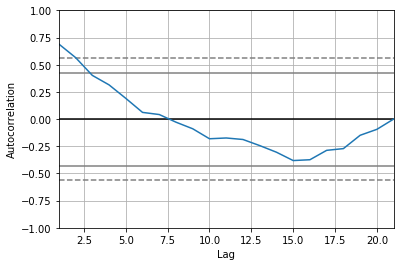

In [37]:
autocorrelation_plot(train)

#p can be 2

C:\Users\Kushagra\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


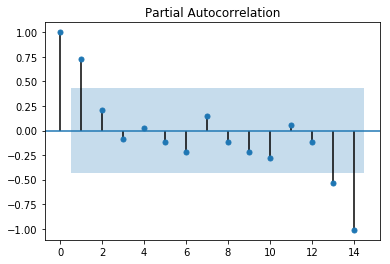

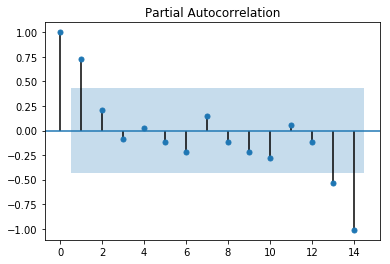

In [38]:
plot_pacf(train)

In [39]:
model=ARIMA(train,order=(4,1,5))
model_fit=model.fit(disp=0)

C:\Users\Kushagra\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Kushagra\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Kushagra\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Kushagra\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Kushagra\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params avail

In [40]:
residuals=pd.DataFrame(model_fit.resid)
residuals.describe()

,0
count,20.000000
mean,-3.303226
std,23.396857
min,-61.771632
25%,-17.848137
50%,-0.845791
75%,10.992723
max,37.063856


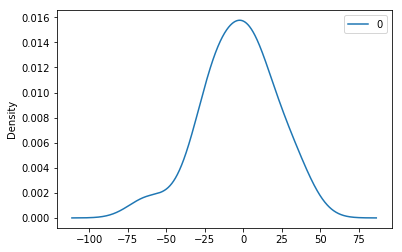

In [41]:
residuals.plot(kind='kde')

C:\Users\Kushagra\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Kushagra\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Kushagra\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


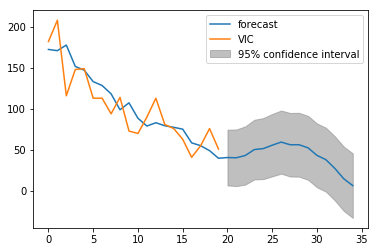

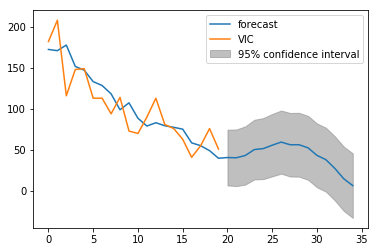

In [42]:
model_fit.plot_predict(start=1,end=35)

In [43]:
predictions=model_fit.forecast(steps=14)[0].round(0)
dates=pd.date_range(start='09/12/2020',periods=14)
predictions

array([41., 40., 43., 50., 52., 56., 60., 56., 56., 53., 43., 38., 27.,
       15.])

In [44]:
predictions=list(predictions)
dates=pd.DataFrame(dates,columns=['Date'])
predictions=pd.DataFrame(predictions,columns=['Cases per day'])
predictions['date']=dates
predictions

,Cases per day,date
0,41.0,2020-09-12
1,40.0,2020-09-13
2,43.0,2020-09-14
3,50.0,2020-09-15
4,52.0,2020-09-16
5,56.0,2020-09-17
6,60.0,2020-09-18
7,56.0,2020-09-19
8,56.0,2020-09-20
9,53.0,2020-09-21


In [45]:
predictions_interval=model_fit.forecast(steps=14)[2]
predictions_interval

array([[  6.75208329,  74.65885923],
       [  5.93193665,  74.90127688],
       [  7.79185347,  78.73663721],
       [ 14.04324563,  86.76033569],
       [ 14.43087877,  88.77816712],
       [ 17.75533104,  93.78133962],
       [ 21.10047331,  97.98426997],
       [ 17.58013482,  95.03628981],
       [ 17.42315458,  95.21686681],
       [ 13.64123586,  91.45507724],
       [  4.43804652,  82.25264484],
       [ -0.83107217,  77.01702445],
       [-11.62623009,  66.47201305],
       [-24.37715942,  53.92643548]])

In [46]:
predictions_interval=list(predictions_interval)
predictions_interval
predictions_interval=pd.DataFrame(predictions_interval,columns=['Lower Interval of Cases per day','Upper Interval of cases per day'])
predictions_interval['date']=dates
predictions_interval

,Lower Interval of Cases per day,Upper Interval of cases per day,date
0,6.752083,74.658859,2020-09-12
1,5.931937,74.901277,2020-09-13
2,7.791853,78.736637,2020-09-14
3,14.043246,86.760336,2020-09-15
4,14.430879,88.778167,2020-09-16
5,17.755331,93.781340,2020-09-17
6,21.100473,97.984270,2020-09-18
7,17.580135,95.036290,2020-09-19
8,17.423155,95.216867,2020-09-20
9,13.641236,91.455077,2020-09-21


In [47]:
pre=predictions.head(14)
pre.to_csv("D:/RMIT Semester 3/Case Studies/victoria covid arima till 19th Sep/predicted_cases_from_12th_Sep_till_25th_Sep.csv")
pre

,Cases per day,date
0,41.0,2020-09-12
1,40.0,2020-09-13
2,43.0,2020-09-14
3,50.0,2020-09-15
4,52.0,2020-09-16
5,56.0,2020-09-17
6,60.0,2020-09-18
7,56.0,2020-09-19
8,56.0,2020-09-20
9,53.0,2020-09-21


In [48]:
dates=pd.date_range(start='09/12/2020',periods=7)
dates=pd.DataFrame(dates,columns=['Date'])
dates

,Date
0,2020-09-12
1,2020-09-13
2,2020-09-14
3,2020-09-15
4,2020-09-16
5,2020-09-17
6,2020-09-18


In [49]:
test=test.reset_index(drop=True)
test=list(test)
test=pd.DataFrame(test,columns=['Cases per day'])
#test['date']=dates['Date']
#test['Date']=dates
test

,Cases per day
0,37
1,41
2,35
3,42
4,42
5,28
6,45


C:\Users\Kushagra\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Kushagra\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Kushagra\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5, 0, 'Date')

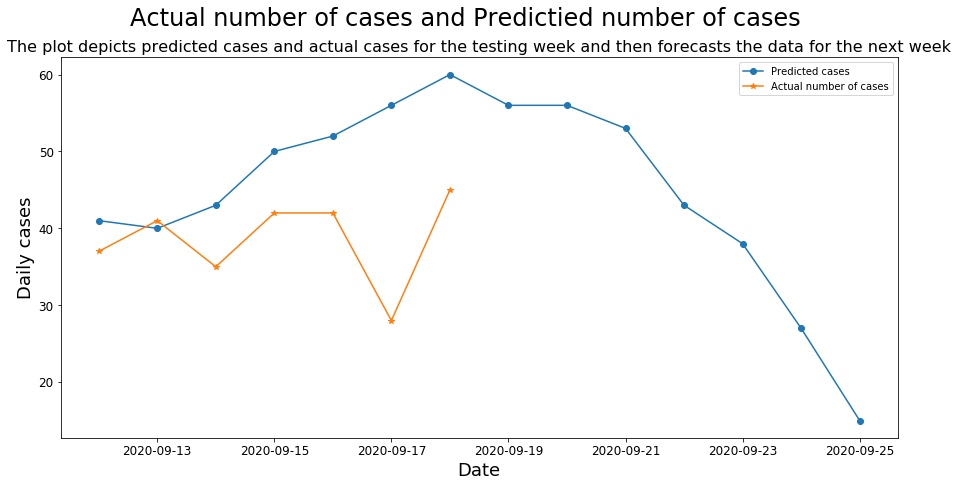

In [50]:
plt.figure(figsize=(15,7))
test=test.reset_index(drop=True)
plt.plot(pre['date'],pre['Cases per day'],label="Predicted cases",marker='o')
plt.plot(dates,test,label="Actual number of cases",marker='*')
plt.ylabel("Daily cases",fontsize=18)
plt.title("\nThe plot depicts predicted cases and actual cases for the testing week and then forecasts the data for the next week",fontsize=16)
plt.suptitle("Actual number of cases and Predictied number of cases",fontsize=24)
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Date",fontsize=18)